# Import libraries

In [1]:
from base64 import b64encode
import numpy as np
import pandas as pd
from IPython.display import HTML

import oddt
import oddt.pandas as opd
from oddt.fingerprints import PLEC

# Protein-Ligand Extended Connectivity Fingerprint (PLEC)

This notebook provides a short guide on how to use Protein-Ligand Extended Connectivity (PLEC) Fingerprint for a series of docked ligands. The output is in CSV format which should be easy to use with other, external software packages.

More informatioFor more information about PLEC see [publication](https://chemrxiv.org/articles/Development_of_a_Protein-Ligand_Extended_Connectivity_PLEC_Fingerprint_and_Its_Application_for_Binding_Affinity_Predictions_/5928406).

# Load receptor (protein) file in pdb, mol2 or other formats

In [2]:
receptor = next(oddt.toolkit.readfile('pdb', 'xiap/receptor_rdkit.pdb'))

# Load ligands file (docked conformations)

In [3]:
data = opd.read_sdf('xiap/actives_docked.sdf')

# Set PLEC FP parameters:

**size:** the lenght of final fingerprint (default=16384)

**depth_protein:** the environment diameter on protein side in bond steps (default=4)

**depth_ligand:** the environment diameter on ligand side in bond steps (default=2)

**distance_cutoff:** the distance between two atoms to be considered interacting (derfault=4.5)

# Generate PLEC FPs

In [4]:
data['plec'] = data['mol'].map(lambda x: list(PLEC(x, protein=receptor, 
                                                   size=4092, 
                                                   depth_protein=5,
                                                   depth_ligand=1,
                                                   distance_cutoff=4.5,
                                                   sparse=False
                                                  )))

,mol,name,act,plec
0,,312335,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...]"
1,,312335,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...]"
2,,312335,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 2, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...]"
3,,312370,10,"[0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 4, 0, 0, 0, 1, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...]"
4,,312335,6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 1, 0, 0, 2, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...]"

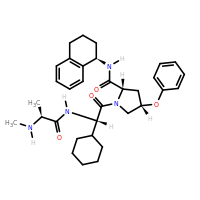
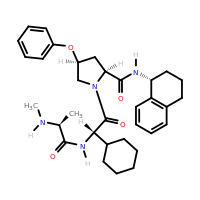
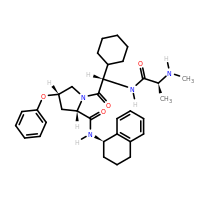
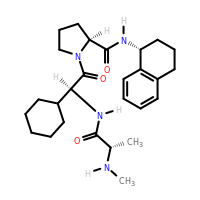
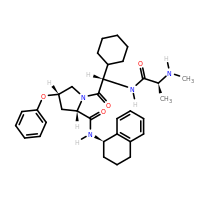

In [5]:
data[['mol', 'name', 'act', 'plec']].head()

# Download CSV with PLEC FP

In [6]:
HTML('<a href="data:application/binary;base64,%s" download="fingerprint.csv">Download CSV</a>' % b64encode(data.to_csv().encode()).decode())